# Perceptron 
#### (Artificial Neuron)

- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy   
(-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

### Learning Goals
- How to implement Perceptron?
- Understanding **Vectorization**,  
  writing efficient Code   
  without using for loop!  
- What is the meaning of "Linear Classifier"?

## Making a simple Perceptron from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

### Generating Data using sklearn

(500, 2) (500,)
[0 0 1 1 1]


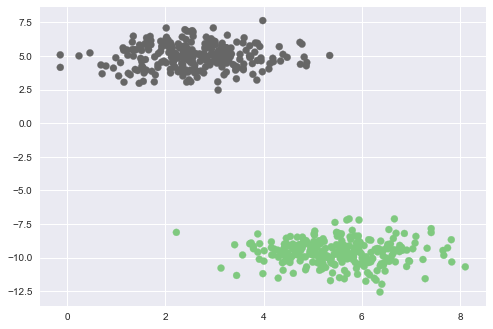

In [5]:
X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)
print(X.shape,Y.shape)
print(Y[:5])
# Y basically contain whether it belong to class 0 or class 1


plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()


(1000, 2) (1000,)


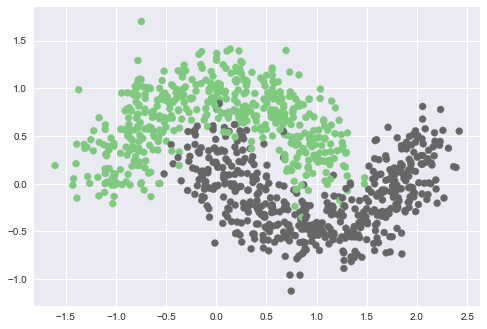

In [4]:
X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
print(X.shape,Y.shape)


plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

## We have to find the line that seprates the two classes and line has the equation w1x1+w2x2___WnXn

## Generating some Model and helper functions

In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [9]:
print(sigmoid(5))


# We can also pass a complete n dimension vector the sigmoid function
# This type of functionality is known as broad casting as sigmoid is now appiled to every element of the array
z=np.array([1,2,3,4,5])
sigmoid(z)

0.9933071490757153


array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss 
- Make the Preditctions

In [10]:
""" Giving weights vector as input and a matrix X """
""" Calculating w1x1+w2x2____wnxn"""
""" Say if X is of the shape m*n so W would be of the shape n*1"""
""" Hence we will get an m*1 output"""

def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions



def loss(X,Y,weights):
    """Binary Cross Entropy"""
    """ y_ is a vector not a single value i.e we are doing it for all the values """
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost



def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    """ Look here carefully that X is of the shape m*n and Y is of the shape m*1"""
    """ So we are doing X Transpose i.e n*m is the shape of X now"""
    """ Hence we finally will be getting n*1 matrix"""
    dw = np.dot(X.T,Y_ - Y)
    
    # m is the total number of examples
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights




def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    # Modify the input to handle the bias term
    # We will be adding a new coloumn of X0 of all ones using hstack
    # so now our X is m*(n+1) ,matrix 
    
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    
    # Init Weights 0
    # Linear array of n+1 entries
    weights = np.zeros(X.shape[1])
    
    
    
    #Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        """ Say after every 10th epoch we are printing the progress"""
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights
    

In [13]:
weights = train(X,Y,learning_rate=0.8,maxEpochs=1000)

Epoch 0 Loss 0.0000
Epoch 10 Loss 0.0000
Epoch 20 Loss 0.0000
Epoch 30 Loss 0.0000
Epoch 40 Loss 0.0000
Epoch 50 Loss 0.0000
Epoch 60 Loss 0.0000
Epoch 70 Loss 0.0000
Epoch 80 Loss 0.0000
Epoch 90 Loss 0.0000
Epoch 100 Loss 0.0000
Epoch 110 Loss 0.0000
Epoch 120 Loss 0.0000
Epoch 130 Loss 0.0000
Epoch 140 Loss 0.0000
Epoch 150 Loss 0.0000
Epoch 160 Loss 0.0000
Epoch 170 Loss 0.0000
Epoch 180 Loss 0.0000
Epoch 190 Loss 0.0000
Epoch 200 Loss 0.0000
Epoch 210 Loss 0.0000
Epoch 220 Loss 0.0000
Epoch 230 Loss 0.0000
Epoch 240 Loss 0.0000
Epoch 250 Loss 0.0000
Epoch 260 Loss 0.0000
Epoch 270 Loss 0.0000
Epoch 280 Loss 0.0000
Epoch 290 Loss 0.0000
Epoch 300 Loss 0.0000
Epoch 310 Loss 0.0000
Epoch 320 Loss 0.0000
Epoch 330 Loss 0.0000
Epoch 340 Loss 0.0000
Epoch 350 Loss 0.0000
Epoch 360 Loss 0.0000
Epoch 370 Loss 0.0000
Epoch 380 Loss 0.0000
Epoch 390 Loss 0.0000
Epoch 400 Loss 0.0000
Epoch 410 Loss 0.0000
Epoch 420 Loss 0.0000
Epoch 430 Loss 0.0000
Epoch 440 Loss 0.0000
Epoch 450 Loss 0.0000

## Loss has reached zero as our dataset is complete linearly Seprable

## We can see that for n entries we have n+1 weight  on weight for n[0] entry
## i.e [ 0.01789722 -0.5376076   2.96753029]

 
### Perceptron Implementation - Part-II 
- Make Predictions
- Visualise Decison Surface
- Linear vs Non-linear classification

In [15]:
x1 = np.linspace(-2,2,10)
print(x1)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


In [14]:
# Prerequisite
a=np.zeros((4,4))
a[2,3]=10
a[a>10]=20
print(a)


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. 10.]
 [ 0.  0.  0.  0.]]


In [81]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        # i.e we have to add the coloumn as ones as 0th feature in the 
        # test data also as while training also we have added this shit as used it as a bias term
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

        
    probs = predict(X_Test,weights)
    
    # If the user doesnot want the labels than we will return probabilities
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [84]:
# from -2 to 2 generate 10 equal space datapoints
x1 = np.linspace(-2,2,10)

# As w0x0+w1x1+w2x2=0 ,so calculate x2 accordingly
x2 = -(weights[0] + weights[1]*x1)/weights[2]

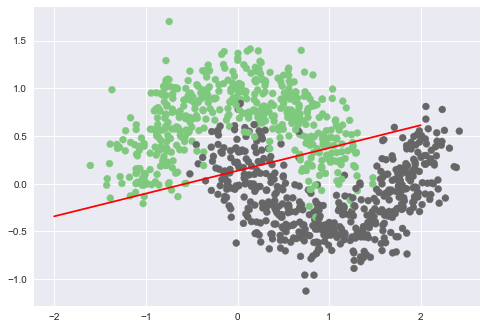

In [85]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [86]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.869


## 87 percent accurate

## Building a multilayer neural network

In [4]:
import numpy as np

# Specifying the model paramters for our model

""" No of input features"""
input_size=3

""" No of neurons in first and second layer"""
layers=[4,3]

"""No of output neurons"""
output_size=2


In [5]:
# Prerequiste 
a=np.array([[5,1,2],[6,1,2]])
print(np.sum(a))
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))


# keepdims preserve the shape of our output
print(np.sum(a,axis=1,keepdims=True))

17
[11  2  4]
[8 9]
[[8]
 [9]]


In [6]:
def softmax(a):
    # a is a Vector hence e_pa is also a vector i.e broad casting 
    e_pa = np.exp(a)
    
    # axis 1 is for the sum along the rows
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [7]:
# Prerequisite
a=np.array([[10,10],
          [20,20]])
softmax(a)


# We can see that each class is having 0.5 probabilty of being selected

array([[0.5, 0.5],
       [0.5, 0.5]])

In [8]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        # Defining a dictonary for the easy access of weights and bias
        model = {} 
        
        # randn gives the random number in the normal distribution
        # w1 is a matrix of size 3*4 i.e input_size*layers[0]
        # b1 is bias will have the same number as the number of neurons in the layers
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        
        # Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
       
        """ x is a input matrix """
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        
        """ sigmoid is not available so we are using tanh activation function in our code"""
        """ tanh do the same thing except that now our output is in the range -1 to 1"""
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        """ In output layer we dont use the activation function we use the softmax function """
        """ softmax function map our output in the scale of probabilty i.e say if the output is 10,10"""
        """ so it will give 0.5 and 0.5"""
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        
        # What we are doing here is that storing the output in the form of tuple
        # i.e storing the data in the form of tuple when data flows to forward layer
        # y_ will be of the shape m*c (here c is the number of output classes and m is the number of example)
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    
    
    # This method propogate our error backward
    # We will start with computing the error at the final layer
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        # This is the output produce at the final layer
        delta3 = y_ - y
        # Change in weights and Change in the bias for the output layer 
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        
        
        # Value coming out of the second layer a2=tan(z2)
        # Now finding the derivate of a2
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        
        # Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    
    # Getting the input data and then just forwarding that data to forward function 
    # after getting the output of probabilites finding the best possible answer i.e using argmaix
    # We get output matrix where each row has all the coloumns as there answers so using axis=1(along rows)
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    
  def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [9]:
# Loss function is going to be categorical cross entropy 

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l


# When we feed labels to classifier we cannot directly feed that labels directly to classifier
# so we convert labels to notation known as one hot notation 
# i.e say for dog ,cat, bat probabilties are 0.6,0.1 and 0.3 so Dog is the answer hence we want 1,0,0 
# So we convert Dog to 100, Cat to 010 and bat to 001
# So now we have a matrix of size (no of examples * no of classes)

def one_hot(y,depth):
    # How many examples we have
    m = y.shape[0]
    
    # Depth is nothing but the number of classes
    y_oht = np.zeros((m,depth))
    
    # it will go to all the m rows and make the corresponding element as 1
    # i.e say we for cat we will set second coloumn as 1 i.e 010
    y_oht[np.arange(m),y] = 1
    return y_oht

## Generating the data

(500, 2)
(500,)


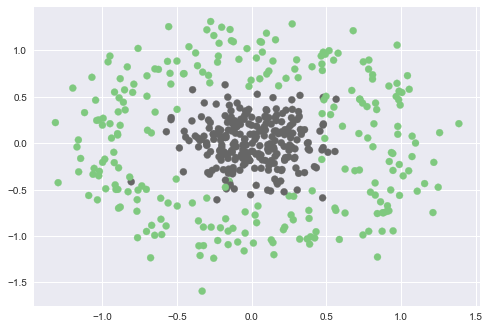

In [10]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

print(X.shape)
print(Y.shape)

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [15]:

# depth is 2 as we here only have 2 classes
Y_oht=one_hot(Y,2)
print(Y_oht[1:7])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## y_oht is the data we will be feeding to our neural network

## Training our Model

In [22]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [19]:
# i.e passing the data single time forward 
# for one point we are going to get two probabilities as 2 number of classes 
# hence for m points we will get m*c as output
print(model.forward(X[0]))


# i.e we have 500 data points in the X
# Say after first hidden layer we get 500* 10 , then 500 * 5 and finally 500*2 i.e how many neurons 
# i.e 500 * no of neurons
model.forward(X).shape

[[0.52335135 0.47664865]]


(500, 2)

In [25]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        # Appending loss to training so that we can plot the graph
        training_loss.append(l)
        
        # Forward and backward propogation in one epoch
        model.backward(X,Y_OHT,learning_rate)
        
        
        if(logs):
            """ Printing the  epcoh and the loss"""
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [26]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

Epoch 489 Loss 0.0395
Epoch 490 Loss 0.0395
Epoch 491 Loss 0.0395
Epoch 492 Loss 0.0395
Epoch 493 Loss 0.0394
Epoch 494 Loss 0.0394
Epoch 495 Loss 0.0394
Epoch 496 Loss 0.0394
Epoch 497 Loss 0.0394
Epoch 498 Loss 0.0394
Epoch 499 Loss 0.0394


## We can see with every epoch loss is continusly decresing 

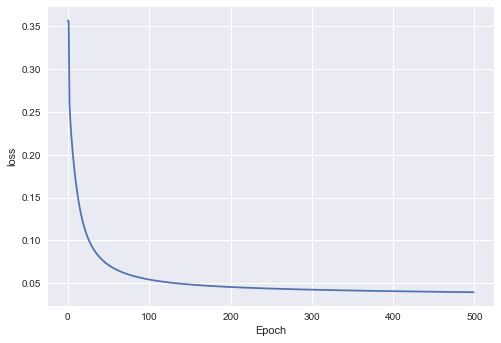

In [27]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()


# We can see with every epoch loss is continusly decreasing